## Simulated Annealing
[Web Resource](http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing)

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [157]:
def obj_fn(x):
    x1=x[0]
    x2=x[1]
    obj= 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj

In [158]:
x_init= [0.8,-0.5]
h=np.arange(-1.0, 1.0, 0.01)
v=np.arange(-1.0, 1.0, 0.01)
h,v =np.meshgrid(h,v)
fn= np.zeros((len(h),len(v))) #fn=np.zeros(h.shape)

In [159]:
for i in range(len(h)):
    for j in range(len(v)):
        fn[i][j]= 0.2 + h[i][j]**2 + v[i][j]**2 - 0.1*math.cos(6.0*3.1415*h[i][j])- 0.1*math.cos(6.0*3.1415*v[i][j])
        

Text(0, 0.5, 'x2')

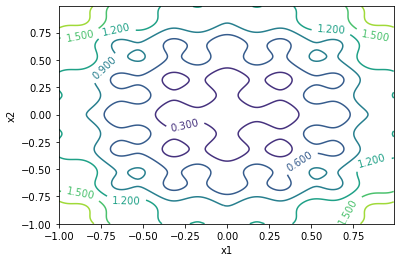

In [160]:
plt.figure()
cont_plot= plt.contour(h,v,fn)
plt.clabel(cont_plot)
plt.xlabel('x1')
plt.ylabel('x2')

In [161]:
n=50 #No. of cycles
m=50 #No. of trials per cycle
pi=0.5 #probability of accepting worse solution at initial temp.
pf=0.001 #probability of accepting worse solution at initial temp.

ti= -1/np.log(pi)
tf= -1/np.log(pf)

#reduction with steps
t_mid= (tf/ti)**(1/(n-1))
x=np.zeros((n+1,2))
x[0]= x_init

xi=np.zeros(2)
xi=x_init
n_accepted=1

#Current accepted solution
xc=np.zeros(2)
xc=x[0]
fc=obj_fn(xi)
fs=np.zeros(n+1)
fs[0]= fc

#current Temp.
t= ti
deltaE_avg= 0

In [162]:
for i in range(n):
    for j in range(m):
        #New points
        xi[0]= xc[0]+random.random()-0.5
        xi[1]= xc[1]+random.random()-0.5
        
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        
        delta_E = abs(obj_fn(xi)-fc)
        
        if obj_fn(xi)>obj_fn(xc):
            if(i==0 and j==0):
                deltaE_avg=delta_E
                
            p= np.exp(-deltaE/(deltaE_avg*t))
            
            if np.random.rand()<p:
                xc[0]=xi[0]
                xc[1]=xi[1]
                fc=obj_fn(xc)
                n_accepted+=1
                deltaE_avg=(deltaE_avg*(n_accepted-1)+delta_E)/n_accepted
                
            else:
                continue 
        else:
            xc[0]=xi[0]
            xc[1]=xi[1]
            fc=obj_fn(xc)
            n_accepted+=1
            deltaE_avg=(deltaE_avg*(n_accepted-1)+delta_E)/n_accepted
            
    x[i+1][0]=xc[0]
    x[i+1][1]=xc[1]
    fs[i+1]= fc
    t= t_mid*t

In [163]:
print('Best Solution '+ str(xc))
print('Best Objective '+ str(fc))

Best Solution [-0.00357446 -0.00722878]
Best Objective 0.0012187569620408928


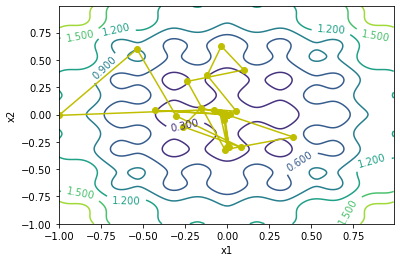

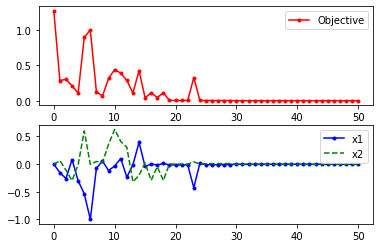

In [169]:
plt.plot(x[:,0],x[:,1],'y-o')
cont_plot= plt.contour(h,v,fn)
plt.clabel(cont_plot)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('contour.png')

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])

# Save the figure as a PNG
plt.savefig('iterations.png')

plt.show()
